In [1]:
import pandas as pd
import numpy as np
from scipy import fft, signal, interpolate
import matplotlib.pyplot as plt

 - https://stackoverflow.com/questions/72253966/have-i-applied-the-fourier-transformation-correctly-to-this-dataframe-exafs-x?noredirect=1#comment127701106_72253966
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
 - https://stackoverflow.com/questions/34428886/discrete-fourier-transformation-from-a-list-of-x-y-points/34432195#34432195
 - https://en.wikipedia.org/wiki/Spectral_density
 - https://en.wikipedia.org/wiki/Periodogram
 - https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

In [2]:
raw = pd.read_csv("https://pastebin.com/raw/ucFekzc6", sep="\t", names=["k", "wchi"], header=0)
#raw.to_excel("Iron_XAFS.xlsx")

In [3]:
raw.shape

(495, 2)

In [4]:
raw = raw.drop_duplicates()

In [5]:
raw.shape

(454, 2)

In [6]:
raw["wchi"].mean()

-0.041941279422907485

In [7]:
raw["wchi"] = raw["wchi"] - raw["wchi"].mean()

In [8]:
raw["wchi"].mean()

-1.5650721051984587e-17

In [9]:
raw["R"] = 1/raw["k"]
raw["chi"] = raw["wchi"]/raw["k"]**2

In [10]:
raw["chi"].mean()

inf

In [11]:
#raw["chi"] = raw["chi"] - raw["chi"].mean()

In [12]:
raw = raw.iloc[1:, :]

In [13]:
raw

,k,wchi,R,chi
2,0.105415,0.029699,9.486277,2.672634
3,0.149080,0.017773,6.707811,0.799685
4,0.365170,-0.084509,2.738452,-0.633741
6,0.384235,-0.095463,2.602576,-0.646610
8,0.447240,-0.131318,2.235937,-0.656515
...,...,...,...,...
490,13.247159,0.236627,0.075488,0.001348
491,13.267277,0.296012,0.075373,0.001682
492,13.287363,0.376003,0.075259,0.002130
493,13.307420,0.531044,0.075146,0.002999


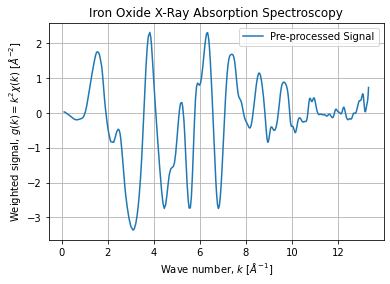

In [14]:
axe = raw.plot(x="k", y="wchi", label="Pre-processed Signal")
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Wave number, $k$ [$\AA^{-1}$]")
axe.set_ylabel(r"Weighted signal, $g(k) = k^2 \chi(k)$ [$\AA^{-2}$]")
axe.grid()

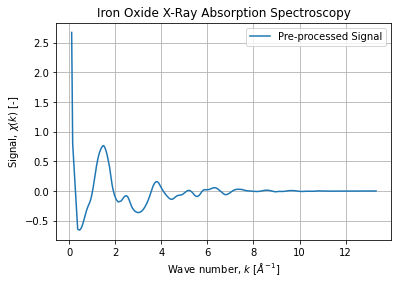

In [15]:
axe = raw.plot(x="k", y="chi", label="Pre-processed Signal")
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Wave number, $k$ [$\AA^{-1}$]")
axe.set_ylabel(r"Signal, $\chi(k)$ [-]")
axe.grid()

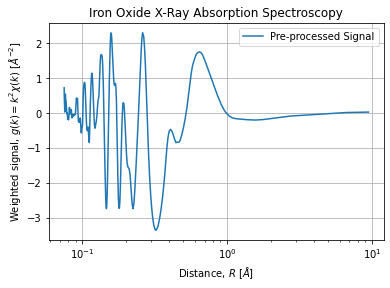

In [16]:
axe = raw.plot(x="R", y="wchi", label="Pre-processed Signal", logx=True)
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"Weighted signal, $g(k) = k^2 \chi(k)$ [$\AA^{-2}$]")
axe.grid()

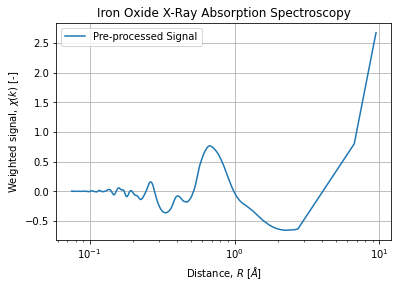

In [17]:
axe = raw.plot(x="R", y="chi", label="Pre-processed Signal", logx=True)
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"Weighted signal, $\chi(k)$ [-]")
axe.grid()

In [18]:
N = 65536
k = np.linspace(raw["k"].min(), raw["k"].max(), N)
interpolant = interpolate.interp1d(raw["k"], raw["wchi"], kind="linear")
g = interpolant(k)

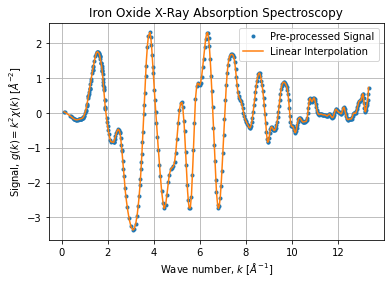

In [19]:
axe = raw.plot(x="k", y="wchi", label="Pre-processed Signal", linestyle="none", marker=".")
axe.plot(k, g, label="Linear Interpolation")
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Wave number, $k$ [$\AA^{-1}$]")
axe.set_ylabel(r"Signal, $g(k) = k^2 \chi(k)$ [$\AA^{-2}$]")
axe.legend()
axe.grid()

In [20]:
R = 2*np.pi*fft.fftfreq(N, np.diff(k)[0])[:N//2]
G = (1/N)*fft.fft(g)[0:N//2]

(0.0, 20.0)

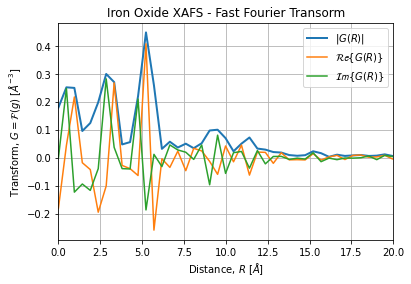

In [21]:
fig, axe = plt.subplots()
axe.plot(R, np.abs(G), linewidth=2, label=r"$|G(R)|$")
axe.plot(R, np.real(G), label=r"$\mathcal{Re}\{G(R)\}$")
axe.plot(R, np.imag(G), label=r"$\mathcal{Im}\{G(R)\}$")
axe.set_title("Iron Oxide XAFS - Fast Fourier Transorm")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"Transform, $G = \mathcal{F}(g)$ [$\AA^{-3}$]")
axe.legend()
axe.grid()
axe.set_xlim([0, 20])

In [22]:
Rhat = np.linspace(raw["R"].min(), raw["R"].max()*2, 5000)
Ghat = signal.lombscargle(raw["k"], raw["wchi"], freqs=Rhat, normalize=True)
#R2 = np.linspace(1e-3, 250, 4096)
#X2 = signal.lombscargle(raw["k"], raw["chi"], freqs=R2, normalize=True)

(0.0, 0.6)

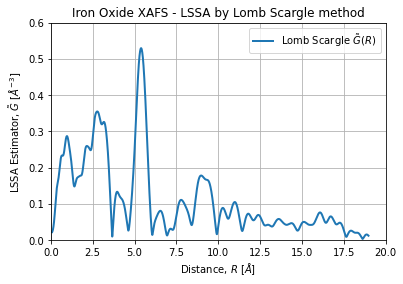

In [23]:
fig, axe = plt.subplots()

axe.plot(Rhat, np.sqrt(Ghat), linewidth=2, label=r"Lomb Scargle $\tilde{G}(R)$")

axe.set_title("Iron Oxide XAFS - LSSA by Lomb Scargle method")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"LSSA Estimator, $\tilde{G}$ [$\AA^{-3}$]")
axe.legend()
axe.grid()
axe.set_xlim([0, 20])
axe.set_ylim([0, 0.6])

(0.0, 0.6)

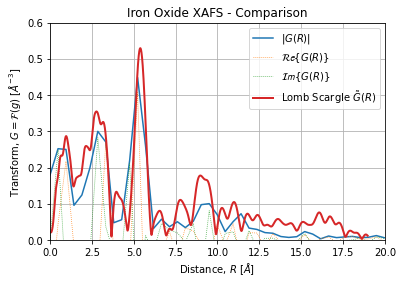

In [24]:
fig, axe = plt.subplots()

axe.plot(R, np.abs(G), label=r"$|G(R)|$")
axe.plot(R, np.real(G), ":", linewidth=0.75, label=r"$\mathcal{Re}\{G(R)\}$")
axe.plot(R, np.imag(G), ":", linewidth=0.75, label=r"$\mathcal{Im}\{G(R)\}$")
axe.plot(Rhat, np.sqrt(Ghat), linewidth=2, label=r"Lomb Scargle $\tilde{G}(R)$")

axe.set_title("Iron Oxide XAFS - Comparison")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"Transform, $G = \mathcal{F}(g)$ [$\AA^{-3}$]")
axe.legend()
axe.grid()
axe.set_xlim([0, 20])
axe.set_ylim([0, 0.6])